In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
SNR_array_3 = []
random_scale = 1100

In [4]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

12 16
l =  0  SNR =  15.728090525519029  m1 =  12  m2 =  16
26 24
l =  1  SNR =  26.813425705649262  m1 =  26  m2 =  24
26 27
l =  1  SNR =  29.825521576831143  m1 =  26  m2 =  27
11 28
l =  1  SNR =  20.35120631031533  m1 =  11  m2 =  28
30 16
l =  1  SNR =  24.733517345422467  m1 =  30  m2 =  16
21 19
l =  1  SNR =  25.960819343748884  m1 =  21  m2 =  19
27 28
l =  1  SNR =  30.924536801001956  m1 =  27  m2 =  28
11 21
l =  1  SNR =  18.734455813400174  m1 =  11  m2 =  21
27 26
l =  2  SNR =  28.051553276248463  m1 =  27  m2 =  26
11 21
l =  2  SNR =  19.18501187449238  m1 =  11  m2 =  21
11 18
l =  3  SNR =  18.71763242147479  m1 =  11  m2 =  18
21 16
l =  4  SNR =  23.474152522057192  m1 =  21  m2 =  16
11 29
l =  4  SNR =  19.595039435341747  m1 =  11  m2 =  29
16 15
l =  5  SNR =  18.55190557197691  m1 =  16  m2 =  15
10 17
l =  6  SNR =  16.889099321420215  m1 =  10  m2 =  17
26 18
l =  7  SNR =  25.80922203911784  m1 =  26  m2 =  18
30 10
l =  7  SNR =  19.395737002304  m1 =  3

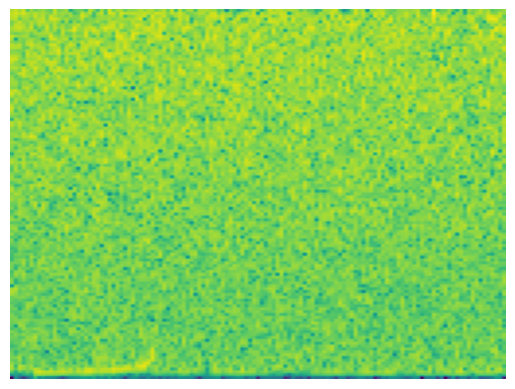

In [5]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 19
l =  100  SNR =  26.65447811896255  m1 =  25  m2 =  19
29 22
l =  100  SNR =  27.46977185109674  m1 =  29  m2 =  22
12 24
l =  100  SNR =  19.996863055989394  m1 =  12  m2 =  24
20 30
l =  101  SNR =  26.0547263357738  m1 =  20  m2 =  30
28 18
l =  101  SNR =  25.67449337738707  m1 =  28  m2 =  18
29 22
l =  101  SNR =  27.870877495791852  m1 =  29  m2 =  22
22 18
l =  101  SNR =  23.384828178777816  m1 =  22  m2 =  18
23 17
l =  101  SNR =  23.562150638417194  m1 =  23  m2 =  17
28 13
l =  101  SNR =  22.470404047421916  m1 =  28  m2 =  13
25 27
l =  101  SNR =  28.759572143620975  m1 =  25  m2 =  27
12 10
l =  101  SNR =  15.303825386349121  m1 =  12  m2 =  10
23 13
l =  102  SNR =  21.84229015897235  m1 =  23  m2 =  13
29 17
l =  102  SNR =  26.156476936818525  m1 =  29  m2 =  17
25 17
l =  102  SNR =  25.149833083268906  m1 =  25  m2 =  17
13 29
l =  102  SNR =  23.658846119633317  m1 =  13  m2 =  29
26 13
l =  102  SNR =  21.87168955564099  m1 =  26  m2 =  13
27 26
l =  102 

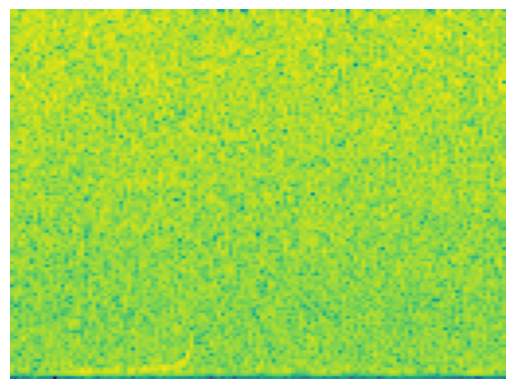

In [6]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 14
l =  200  SNR =  19.19953610906593  m1 =  20  m2 =  14
25 16
l =  201  SNR =  23.287558400376263  m1 =  25  m2 =  16
11 22
l =  201  SNR =  18.23743913496575  m1 =  11  m2 =  22
30 27
l =  202  SNR =  31.77525551403174  m1 =  30  m2 =  27
15 19
l =  202  SNR =  20.454922391957556  m1 =  15  m2 =  19
15 25
l =  202  SNR =  21.40353297969398  m1 =  15  m2 =  25
12 30
l =  202  SNR =  20.695233213466484  m1 =  12  m2 =  30
13 14
l =  202  SNR =  18.09400425608857  m1 =  13  m2 =  14
15 26
l =  203  SNR =  22.923425513737723  m1 =  15  m2 =  26
20 24
l =  203  SNR =  25.881565971990582  m1 =  20  m2 =  24
12 11
l =  203  SNR =  14.224327890542092  m1 =  12  m2 =  11
18 15
l =  204  SNR =  20.630845271357273  m1 =  18  m2 =  15
28 17
l =  204  SNR =  23.975544375748616  m1 =  28  m2 =  17
13 28
l =  204  SNR =  21.26921193806205  m1 =  13  m2 =  28
25 29
l =  204  SNR =  29.75026599132881  m1 =  25  m2 =  29
20 12
l =  204  SNR =  17.164393034679886  m1 =  20  m2 =  12
11 12
l =  205 

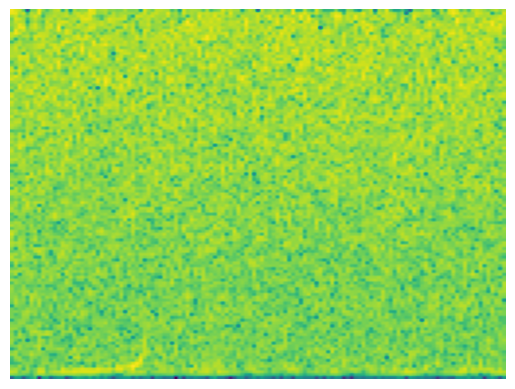

In [7]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 29
l =  300  SNR =  20.304015642910013  m1 =  11  m2 =  29
17 27
l =  300  SNR =  23.613010439793115  m1 =  17  m2 =  27
17 11
l =  300  SNR =  17.087058553044532  m1 =  17  m2 =  11
14 27
l =  301  SNR =  22.42128187177759  m1 =  14  m2 =  27
17 10
l =  301  SNR =  15.819766161100311  m1 =  17  m2 =  10
13 10
l =  302  SNR =  15.617671631634604  m1 =  13  m2 =  10
16 13
l =  303  SNR =  18.95966163220733  m1 =  16  m2 =  13
23 11
l =  304  SNR =  16.53515490204144  m1 =  23  m2 =  11
13 10
l =  305  SNR =  14.837934604033627  m1 =  13  m2 =  10
16 15
l =  306  SNR =  19.225229356607052  m1 =  16  m2 =  15
25 15
l =  307  SNR =  22.699335960980623  m1 =  25  m2 =  15
29 21
l =  307  SNR =  25.61566450311489  m1 =  29  m2 =  21
17 12
l =  307  SNR =  17.461625455205088  m1 =  17  m2 =  12
30 11
l =  308  SNR =  18.877844702855306  m1 =  30  m2 =  11
26 11
l =  309  SNR =  18.99254046357228  m1 =  26  m2 =  11
28 15
l =  310  SNR =  24.456725233767273  m1 =  28  m2 =  15
22 24
l =  31

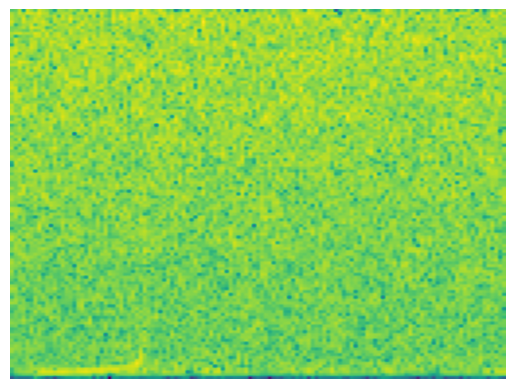

In [8]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 14
l =  400  SNR =  19.255592921400495  m1 =  16  m2 =  14
16 17
l =  401  SNR =  21.926031186858996  m1 =  16  m2 =  17
11 21
l =  401  SNR =  17.063684390396364  m1 =  11  m2 =  21
30 27
l =  402  SNR =  30.93085858496514  m1 =  30  m2 =  27
18 20
l =  402  SNR =  23.034826958076405  m1 =  18  m2 =  20
18 22
l =  402  SNR =  24.409612306473708  m1 =  18  m2 =  22
21 30
l =  402  SNR =  27.11137633058623  m1 =  21  m2 =  30
25 24
l =  402  SNR =  27.816844272919436  m1 =  25  m2 =  24
30 16
l =  402  SNR =  25.252130086700493  m1 =  30  m2 =  16
28 22
l =  402  SNR =  26.471181137265496  m1 =  28  m2 =  22
24 30
l =  402  SNR =  29.258740568179228  m1 =  24  m2 =  30
19 29
l =  402  SNR =  26.586548031897912  m1 =  19  m2 =  29
30 11
l =  402  SNR =  20.251364058640153  m1 =  30  m2 =  11
30 23
l =  402  SNR =  29.106732655375104  m1 =  30  m2 =  23
17 12
l =  402  SNR =  18.202580844115797  m1 =  17  m2 =  12
26 21
l =  403  SNR =  27.682206470176286  m1 =  26  m2 =  21
29 16
l = 

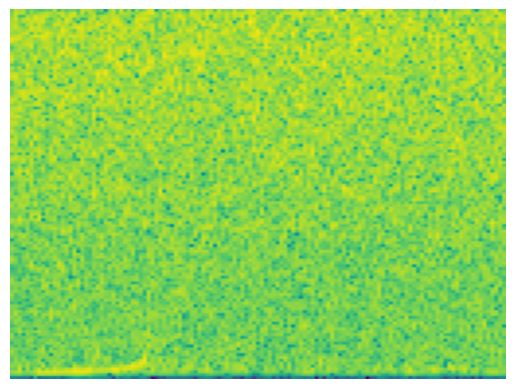

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [10]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 21
l =  500  SNR =  25.515096124739678  m1 =  24  m2 =  21
20 14
l =  500  SNR =  19.996865026033515  m1 =  20  m2 =  14
29 20
l =  501  SNR =  27.205870282140125  m1 =  29  m2 =  20
16 15
l =  501  SNR =  20.458316044350774  m1 =  16  m2 =  15
27 21
l =  501  SNR =  27.457703137454192  m1 =  27  m2 =  21
19 19
l =  501  SNR =  22.039705511103932  m1 =  19  m2 =  19
22 15
l =  501  SNR =  22.55691878835602  m1 =  22  m2 =  15
18 23
l =  501  SNR =  23.662679421452772  m1 =  18  m2 =  23
20 26
l =  501  SNR =  26.01570194006417  m1 =  20  m2 =  26
25 13
l =  501  SNR =  19.26370690974582  m1 =  25  m2 =  13
21 14
l =  502  SNR =  20.216980546179098  m1 =  21  m2 =  14
20 17
l =  502  SNR =  21.455798729189308  m1 =  20  m2 =  17
17 11
l =  502  SNR =  18.048051589171944  m1 =  17  m2 =  11
22 23
l =  503  SNR =  26.98328316357102  m1 =  22  m2 =  23
15 11
l =  503  SNR =  17.94666454054992  m1 =  15  m2 =  11
23 17
l =  504  SNR =  24.53175308489463  m1 =  23  m2 =  17
16 17
l =  504

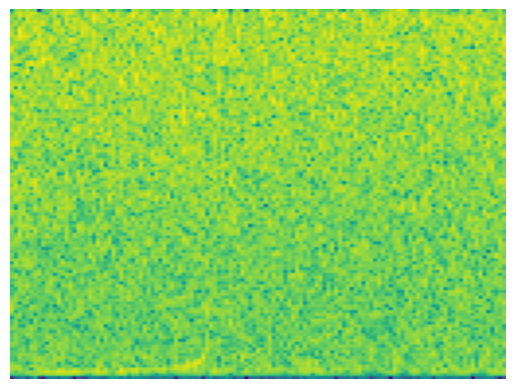

In [11]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 18
l =  600  SNR =  25.68613470539123  m1 =  30  m2 =  18
17 29
l =  600  SNR =  23.829959707137366  m1 =  17  m2 =  29
23 26
l =  600  SNR =  27.23556216245619  m1 =  23  m2 =  26
20 17
l =  600  SNR =  19.68765797434595  m1 =  20  m2 =  17
13 12
l =  601  SNR =  16.616348384924787  m1 =  13  m2 =  12
13 16
l =  602  SNR =  18.38829769711976  m1 =  13  m2 =  16
10 14
l =  603  SNR =  14.922679632583101  m1 =  10  m2 =  14
23 17
l =  604  SNR =  23.438338157595926  m1 =  23  m2 =  17
19 15
l =  604  SNR =  19.663154588923803  m1 =  19  m2 =  15
24 14
l =  605  SNR =  22.01929463753513  m1 =  24  m2 =  14
30 25
l =  605  SNR =  29.78427667973755  m1 =  30  m2 =  25
23 21
l =  605  SNR =  24.35861613767168  m1 =  23  m2 =  21
16 20
l =  605  SNR =  20.415588487371142  m1 =  16  m2 =  20
27 13
l =  605  SNR =  20.512715995095014  m1 =  27  m2 =  13
19 13
l =  605  SNR =  18.26330701742586  m1 =  19  m2 =  13
16 13
l =  606  SNR =  17.546730326030087  m1 =  16  m2 =  13
25 16
l =  607  

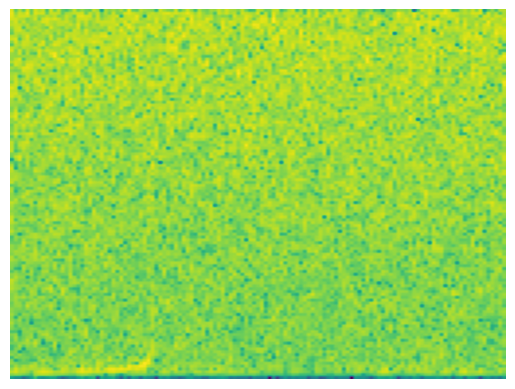

In [12]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 16
l =  700  SNR =  20.577418130126148  m1 =  18  m2 =  16
29 18
l =  700  SNR =  26.699380265036734  m1 =  29  m2 =  18
26 22
l =  700  SNR =  28.518086459486714  m1 =  26  m2 =  22
24 15
l =  700  SNR =  23.124953380863413  m1 =  24  m2 =  15
12 29
l =  700  SNR =  20.91173569298702  m1 =  12  m2 =  29
27 18
l =  700  SNR =  24.127093745416182  m1 =  27  m2 =  18
19 24
l =  700  SNR =  24.16617034651524  m1 =  19  m2 =  24
19 29
l =  700  SNR =  26.614041296336445  m1 =  19  m2 =  29
20 23
l =  700  SNR =  24.290471901874852  m1 =  20  m2 =  23
11 14
l =  700  SNR =  15.350448217868786  m1 =  11  m2 =  14
16 19
l =  701  SNR =  22.409402647875744  m1 =  16  m2 =  19
19 12
l =  701  SNR =  18.822431948620846  m1 =  19  m2 =  12
22 24
l =  702  SNR =  28.399490597783156  m1 =  22  m2 =  24
24 18
l =  702  SNR =  23.1645298801133  m1 =  24  m2 =  18
10 20
l =  702  SNR =  17.915153530624178  m1 =  10  m2 =  20
24 28
l =  703  SNR =  28.783791809769408  m1 =  24  m2 =  28
12 21
l =  7

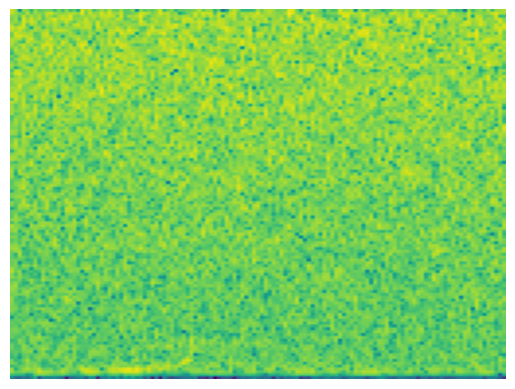

In [13]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 30
l =  800  SNR =  29.536435119530406  m1 =  23  m2 =  30
12 29
l =  800  SNR =  21.11556394805534  m1 =  12  m2 =  29
17 13
l =  800  SNR =  17.619300329527167  m1 =  17  m2 =  13
20 23
l =  801  SNR =  24.57264131417616  m1 =  20  m2 =  23
10 23
l =  801  SNR =  18.051806792430607  m1 =  10  m2 =  23
10 11
l =  802  SNR =  15.363890952289657  m1 =  10  m2 =  11
16 13
l =  803  SNR =  18.64153031385624  m1 =  16  m2 =  13
18 26
l =  804  SNR =  24.09082024901994  m1 =  18  m2 =  26
16 27
l =  804  SNR =  22.67879426999982  m1 =  16  m2 =  27
16 16
l =  804  SNR =  21.0882000424696  m1 =  16  m2 =  16
24 30
l =  804  SNR =  29.849920156890352  m1 =  24  m2 =  30
12 12
l =  804  SNR =  16.09782926408129  m1 =  12  m2 =  12
29 13
l =  805  SNR =  22.371702776454587  m1 =  29  m2 =  13
16 25
l =  805  SNR =  22.505722677848745  m1 =  16  m2 =  25
19 14
l =  805  SNR =  21.28349483287857  m1 =  19  m2 =  14
28 22
l =  805  SNR =  25.979822918976005  m1 =  28  m2 =  22
25 10
l =  805  S

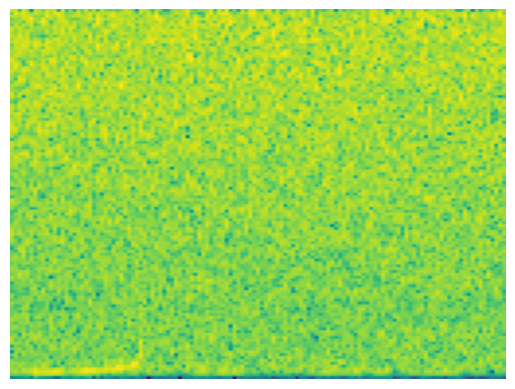

In [14]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 22
l =  900  SNR =  26.214713290440454  m1 =  23  m2 =  22
29 24
l =  900  SNR =  28.19231065738532  m1 =  29  m2 =  24
11 20
l =  900  SNR =  18.81270778214292  m1 =  11  m2 =  20
15 29
l =  901  SNR =  22.929828540809076  m1 =  15  m2 =  29
30 28
l =  901  SNR =  32.11191194949219  m1 =  30  m2 =  28
29 29
l =  901  SNR =  31.9749790036485  m1 =  29  m2 =  29
10 18
l =  901  SNR =  18.312996709007066  m1 =  10  m2 =  18
14 16
l =  902  SNR =  18.455331745450756  m1 =  14  m2 =  16
24 27
l =  903  SNR =  28.582861144403765  m1 =  24  m2 =  27
30 30
l =  903  SNR =  31.398422142963685  m1 =  30  m2 =  30
20 17
l =  903  SNR =  23.62562149177691  m1 =  20  m2 =  17
17 13
l =  903  SNR =  17.249651391977597  m1 =  17  m2 =  13
14 14
l =  904  SNR =  19.071958068936382  m1 =  14  m2 =  14
15 23
l =  905  SNR =  21.610894004649982  m1 =  15  m2 =  23
13 14
l =  905  SNR =  18.86408917073585  m1 =  13  m2 =  14
14 27
l =  906  SNR =  23.363871396126402  m1 =  14  m2 =  27
10 28
l =  906 

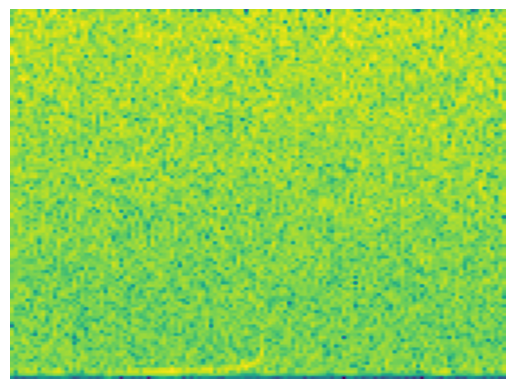

In [15]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 21
l =  1000  SNR =  26.094840119003806  m1 =  22  m2 =  21
29 13
l =  1000  SNR =  20.43685848668858  m1 =  29  m2 =  13
18 16
l =  1000  SNR =  20.36621748467077  m1 =  18  m2 =  16
28 20
l =  1000  SNR =  27.14012427386368  m1 =  28  m2 =  20
16 18
l =  1000  SNR =  20.196651294178913  m1 =  16  m2 =  18
26 19
l =  1000  SNR =  25.183424513219  m1 =  26  m2 =  19
16 25
l =  1000  SNR =  24.138972758535907  m1 =  16  m2 =  25
21 28
l =  1000  SNR =  26.748620105258254  m1 =  21  m2 =  28
16 25
l =  1000  SNR =  22.85955381759144  m1 =  16  m2 =  25
22 10
l =  1000  SNR =  15.973151942949945  m1 =  22  m2 =  10
29 22
l =  1001  SNR =  28.256404221558537  m1 =  29  m2 =  22
21 23
l =  1001  SNR =  25.558324604963502  m1 =  21  m2 =  23
16 10
l =  1001  SNR =  15.069570063142113  m1 =  16  m2 =  10
17 23
l =  1002  SNR =  24.102184601811903  m1 =  17  m2 =  23
22 19
l =  1002  SNR =  22.789543917582314  m1 =  22  m2 =  19
30 29
l =  1002  SNR =  32.26092103860196  m1 =  30  m2 =  29


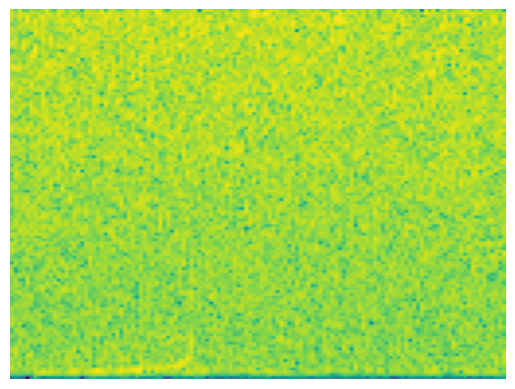

In [16]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 24
l =  1100  SNR =  26.83100082585271  m1 =  22  m2 =  24
25 11
l =  1100  SNR =  20.7782262752349  m1 =  25  m2 =  11
21 17
l =  1100  SNR =  21.66100226471144  m1 =  21  m2 =  17
11 16
l =  1100  SNR =  18.872852016935642  m1 =  11  m2 =  16
18 15
l =  1101  SNR =  21.64605351127839  m1 =  18  m2 =  15
30 14
l =  1101  SNR =  22.368497324652626  m1 =  30  m2 =  14
14 22
l =  1101  SNR =  22.111587341038394  m1 =  14  m2 =  22
26 25
l =  1101  SNR =  25.423764902817354  m1 =  26  m2 =  25
28 27
l =  1101  SNR =  30.76243705517737  m1 =  28  m2 =  27
18 22
l =  1101  SNR =  23.769459428678836  m1 =  18  m2 =  22
16 11
l =  1101  SNR =  16.767748770917922  m1 =  16  m2 =  11
24 26
l =  1102  SNR =  28.128562056924398  m1 =  24  m2 =  26
15 19
l =  1102  SNR =  20.61562513927564  m1 =  15  m2 =  19
12 27
l =  1102  SNR =  21.14803805916704  m1 =  12  m2 =  27
17 27
l =  1102  SNR =  24.53050972341905  m1 =  17  m2 =  27
24 19
l =  1102  SNR =  24.365076598901833  m1 =  24  m2 =  19
2

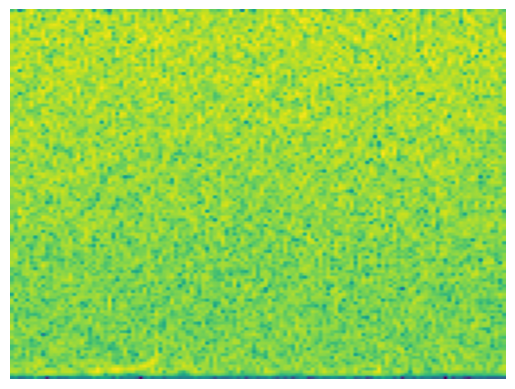

In [17]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 18
l =  1200  SNR =  18.08890552063087  m1 =  10  m2 =  18
24 28
l =  1201  SNR =  28.917795734772824  m1 =  24  m2 =  28
30 13
l =  1201  SNR =  21.781922842620144  m1 =  30  m2 =  13
19 16
l =  1201  SNR =  22.501358636528224  m1 =  19  m2 =  16
20 29
l =  1201  SNR =  27.215738836099842  m1 =  20  m2 =  29
11 13
l =  1201  SNR =  16.019973103655854  m1 =  11  m2 =  13
23 21
l =  1202  SNR =  24.237477008680862  m1 =  23  m2 =  21
14 17
l =  1202  SNR =  18.32359637871054  m1 =  14  m2 =  17
17 21
l =  1203  SNR =  21.91558505580793  m1 =  17  m2 =  21
21 16
l =  1203  SNR =  21.62857903092238  m1 =  21  m2 =  16
12 29
l =  1203  SNR =  20.740292007188046  m1 =  12  m2 =  29
29 11
l =  1203  SNR =  19.945910416734073  m1 =  29  m2 =  11
13 14
l =  1204  SNR =  18.66843218234261  m1 =  13  m2 =  14
14 12
l =  1205  SNR =  16.71369224998293  m1 =  14  m2 =  12
23 12
l =  1206  SNR =  20.44271899870781  m1 =  23  m2 =  12
19 18
l =  1206  SNR =  20.189200457983144  m1 =  19  m2 =  18

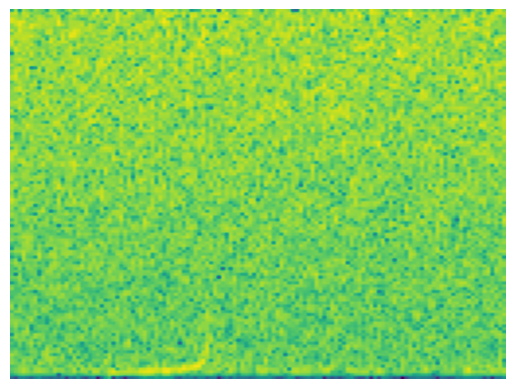

In [18]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 25
l =  1300  SNR =  18.262758761879173  m1 =  12  m2 =  25
27 11
l =  1301  SNR =  19.868333146403128  m1 =  27  m2 =  11
16 25
l =  1302  SNR =  22.30243404756223  m1 =  16  m2 =  25
26 27
l =  1302  SNR =  30.748077344634314  m1 =  26  m2 =  27
26 12
l =  1302  SNR =  19.040822728618245  m1 =  26  m2 =  12
20 25
l =  1303  SNR =  25.187243013727034  m1 =  20  m2 =  25
18 29
l =  1303  SNR =  24.312634050492363  m1 =  18  m2 =  29
20 28
l =  1303  SNR =  24.18643082405519  m1 =  20  m2 =  28
29 11
l =  1303  SNR =  19.465039382462283  m1 =  29  m2 =  11
24 15
l =  1304  SNR =  22.36526839858287  m1 =  24  m2 =  15
19 13
l =  1304  SNR =  19.43462070327919  m1 =  19  m2 =  13
21 23
l =  1305  SNR =  27.311978321514584  m1 =  21  m2 =  23
12 28
l =  1305  SNR =  20.82282019598243  m1 =  12  m2 =  28
19 17
l =  1305  SNR =  23.59914437822087  m1 =  19  m2 =  17
28 29
l =  1305  SNR =  30.956335656146162  m1 =  28  m2 =  29
15 16
l =  1305  SNR =  19.867836229342014  m1 =  15  m2 =  1

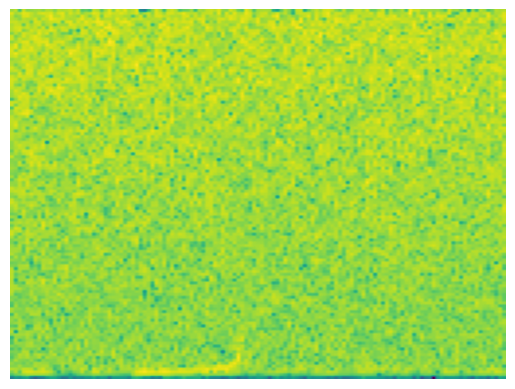

In [19]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 26
l =  1400  SNR =  23.694371067804017  m1 =  16  m2 =  26
21 14
l =  1400  SNR =  22.443887289297145  m1 =  21  m2 =  14
18 21
l =  1400  SNR =  22.458459328190422  m1 =  18  m2 =  21
29 18
l =  1400  SNR =  25.10506803082587  m1 =  29  m2 =  18
25 13
l =  1400  SNR =  20.325989847703283  m1 =  25  m2 =  13
19 18
l =  1400  SNR =  21.675083912068363  m1 =  19  m2 =  18
29 26
l =  1400  SNR =  29.528421663161705  m1 =  29  m2 =  26
20 30
l =  1400  SNR =  25.972162727200097  m1 =  20  m2 =  30
21 19
l =  1400  SNR =  22.35691355518655  m1 =  21  m2 =  19
27 26
l =  1400  SNR =  29.29497378954256  m1 =  27  m2 =  26
21 13
l =  1400  SNR =  18.702055684957724  m1 =  21  m2 =  13
27 12
l =  1401  SNR =  21.082069769234558  m1 =  27  m2 =  12
12 28
l =  1401  SNR =  22.19076861153442  m1 =  12  m2 =  28
23 28
l =  1401  SNR =  27.228609116274104  m1 =  23  m2 =  28
26 19
l =  1401  SNR =  24.890054005003996  m1 =  26  m2 =  19
12 23
l =  1401  SNR =  20.666924535119627  m1 =  12  m2 = 

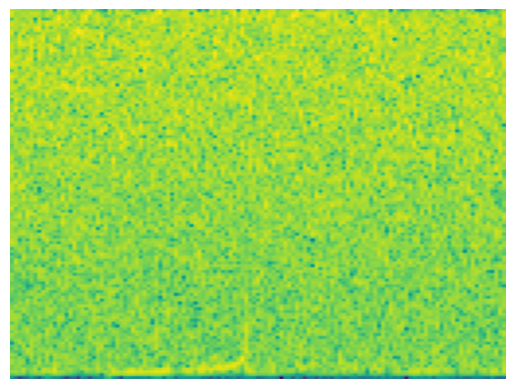

In [20]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 24000))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+24000}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

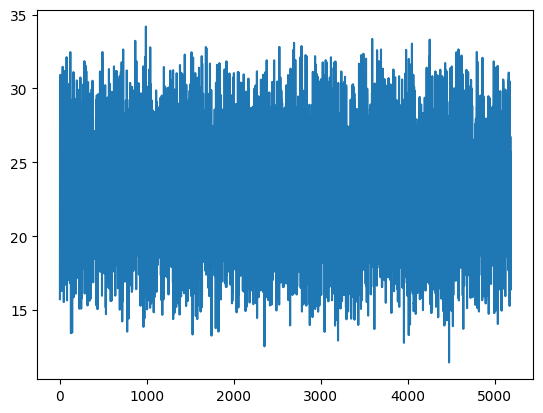

In [21]:
plt.plot(SNR_array_3)

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
